## Aim 1: To perform Image sampling and quantization using Python. [cite: 3]

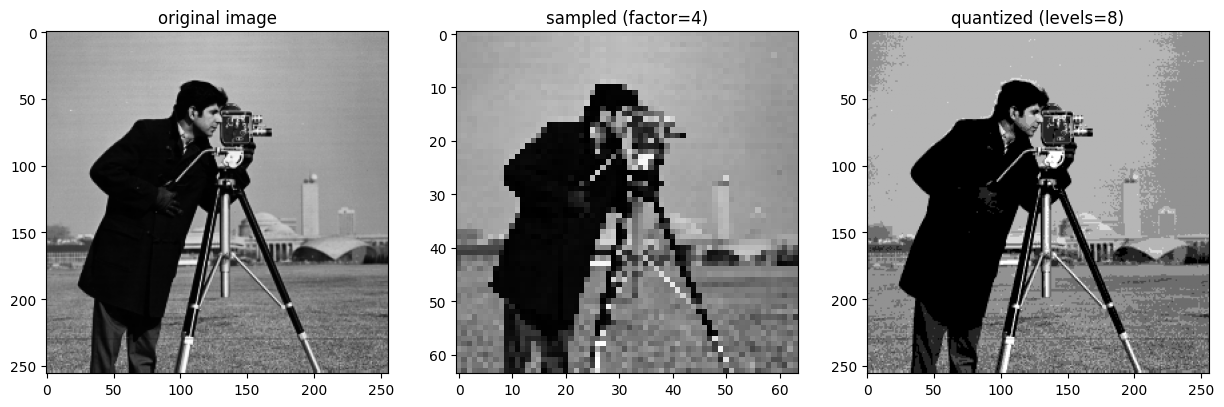

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_sample(image, factor):
    # sampling refers to selecting discrete points [cite: 8]
    # we take every 'factor' pixel to reduce spatial resolution [cite: 40]
    return image[::factor, ::factor]

def manual_quantize(image, levels):
    # quantization maps continuous intensity to a finite set [cite: 17]
    # calculating the size of each interval
    interval = 256 / levels
    # mapping values to the nearest level [cite: 19]
    quantized = (np.floor(image / interval) * interval).astype(np.uint8)
    return quantized

img1 = cv2.imread('cameraman.png', cv2.IMREAD_GRAYSCALE)
sampled_img = manual_sample(img1, 4) # sampling factor 4 [cite: 32]
quantized_img = manual_quantize(img1, 8) # 8 intensity levels [cite: 33]

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1); plt.imshow(img1, cmap='gray'); plt.title('original image')
plt.subplot(1, 3, 2); plt.imshow(sampled_img, cmap='gray'); plt.title('sampled (factor=4)')
plt.subplot(1, 3, 3); plt.imshow(quantized_img, cmap='gray'); plt.title('quantized (levels=8)')
plt.show()

## Aim 2: Analysis of intensity, special resolution and histogram of colour channels of an image using python. [cite: 34]

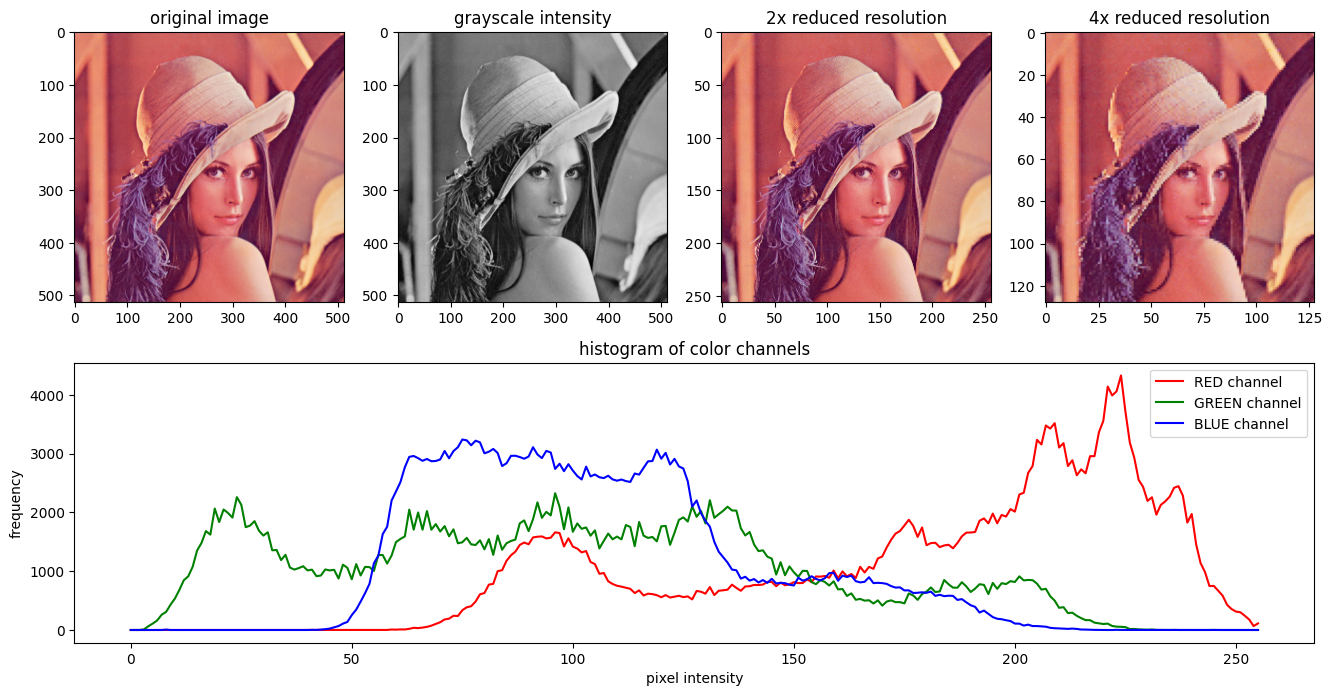

In [3]:
def get_histogram(channel):
    # manual histogram calculation without using np.histogram
    hist = np.zeros(256)
    for pixel in channel.flatten():
        hist[pixel] += 1
    return hist

img2 = cv2.imread('input.png')
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray_img = (0.2989 * img2_rgb[:,:,0] + 0.5870 * img2_rgb[:,:,1] + 0.1140 * img2_rgb[:,:,2]).astype(np.uint8)

res_2x = manual_sample(img2_rgb, 2) # 2x reduced resolution [cite: 50]
res_4x = manual_sample(img2_rgb, 4) # 4x reduced resolution [cite: 51]

plt.figure(figsize=(16, 8))
plt.subplot(2, 4, 1); plt.imshow(img2_rgb); plt.title('original image')
plt.subplot(2, 4, 2); plt.imshow(gray_img, cmap='gray'); plt.title('grayscale intensity')
plt.subplot(2, 4, 3); plt.imshow(res_2x); plt.title('2x reduced resolution')
plt.subplot(2, 4, 4); plt.imshow(res_4x); plt.title('4x reduced resolution')

colors = ('red', 'green', 'blue')
plt.subplot(2, 1, 2)
for i, color in enumerate(colors):
    hist = get_histogram(img2_rgb[:, :, i])
    plt.plot(hist, color=color, label=f'{color.upper()} channel')
plt.title('histogram of color channels')
plt.xlabel('pixel intensity'); plt.ylabel('frequency')
plt.legend(); plt.show()

## Aim 3: Perform Intensity transformation of images using Python. [cite: 69]

/var/folders/j3/89nr82vj49b4h72r44_trny40000gn/T/ipykernel_4786/2952502038.py:5: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img))
/var/folders/j3/89nr82vj49b4h72r44_trny40000gn/T/ipykernel_4786/2952502038.py:5: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img))
/var/folders/j3/89nr82vj49b4h72r44_trny40000gn/T/ipykernel_4786/2952502038.py:6: RuntimeWarning: divide by zero encountered in log
  return (c * np.log(1 + img)).astype(np.uint8) # enhances dark regions [cite: 89]
/var/folders/j3/89nr82vj49b4h72r44_trny40000gn/T/ipykernel_4786/2952502038.py:6: RuntimeWarning: invalid value encountered in multiply
  return (c * np.log(1 + img)).astype(np.uint8) # enhances dark regions [cite: 89]
/var/folders/j3/89nr82vj49b4h72r44_trny40000gn/T/ipykernel_4786/2952502038.py:6: RuntimeWarning: invalid value encountered in cast
  return (c * np.log(1 + img)).astype(np.uint8) # enhances dark regions [cite: 89]


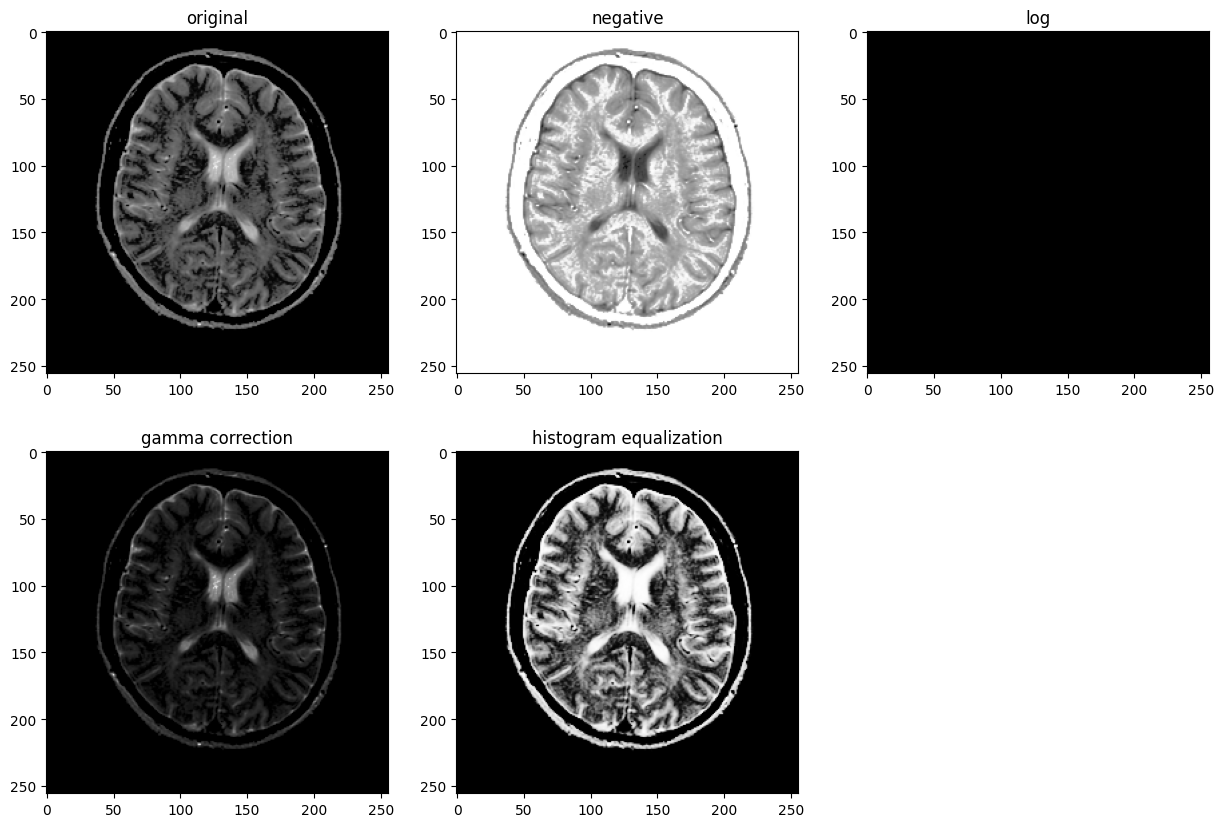

In [4]:
def negative_trans(img):
    return 255 - img # inverts pixel intensities [cite: 86]

def log_trans(img):
    c = 255 / np.log(1 + np.max(img))
    return (c * np.log(1 + img)).astype(np.uint8) # enhances dark regions [cite: 89]

def gamma_trans(img, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype(np.uint8)
    return table[img] # non-linear brightness adjustment [cite: 91]

def hist_equalization(img):
    hist = get_histogram(img)
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    return cdf_normalized[img].astype(np.uint8) # redistributes intensities for contrast [cite: 95]

img3 = cv2.imread('mri.png', cv2.IMREAD_GRAYSCALE)
neg = negative_trans(img3)
log = log_trans(img3)
gam = gamma_trans(img3, 0.5) # gamma < 1 brightens [cite: 92]
heq = hist_equalization(img3)

titles = ['original', 'negative', 'log', 'gamma correction', 'histogram equalization']
images = [img3, neg, log, gam, heq]
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 3, i+1); plt.imshow(images[i], cmap='gray'); plt.title(titles[i])
plt.show()

## Aim 4: Perform Reconstruction of an image Using Python. [cite: 102]

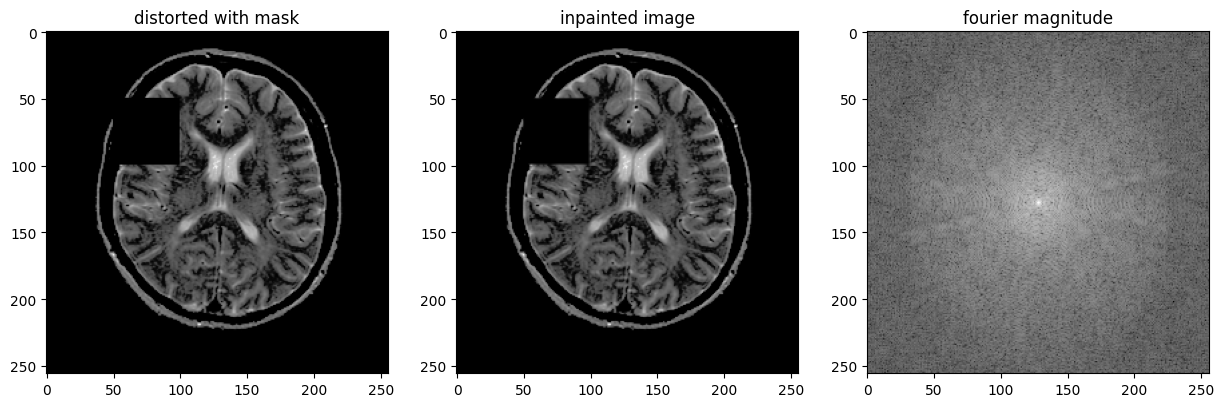

In [5]:
def manual_inpainting(img, mask):
    # simplified inpainting: filling masked parts with neighborhood mean [cite: 122]
    inpainted = img.copy()
    rows, cols = np.where(mask > 0)
    for r, c in zip(rows, cols):
        inpainted[r, c] = np.mean(img[max(0, r-1):r+2, max(0, c-1):c+2])
    return inpainted

img4 = cv2.imread('mri.png', cv2.IMREAD_GRAYSCALE)
mask = np.zeros_like(img4)
mask[50:100, 50:100] = 255 # creating a missing region [cite: 132]
distorted = img4.copy()
distorted[50:100, 50:100] = 0

reconstructed = manual_inpainting(distorted, mask)

f_transform = np.fft.fft2(img4)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift)) # frequency components [cite: 129]

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1); plt.imshow(distorted, cmap='gray'); plt.title('distorted with mask')
plt.subplot(1, 3, 2); plt.imshow(reconstructed, cmap='gray'); plt.title('inpainted image')
plt.subplot(1, 3, 3); plt.imshow(magnitude_spectrum, cmap='gray'); plt.title('fourier magnitude')
plt.show()

## Aim 5: For the given images, apply decimation (down sampling), nearest neighbour interpolation, bilinear interpolation and bicubic interpolation. [cite: 140]

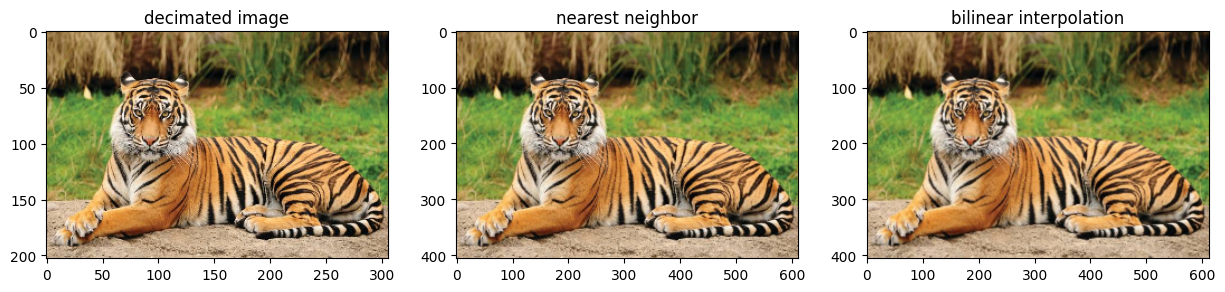

In [6]:
def nearest_neighbor(img, scale):
    old_h, old_w = img.shape[:2]
    new_h, new_w = int(old_h * scale), int(old_w * scale)
    res = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    for i in range(new_h):
        for j in range(new_w):
            res[i, j] = img[int(i / scale), int(j / scale)]
    return res

def bilinear_interpolation(img, scale):
    old_h, old_w = img.shape[:2]
    new_h, new_w = int(old_h * scale), int(old_w * scale)
    res = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    for i in range(new_h):
        for j in range(new_w):
            x, y = i / scale, j / scale
            x1, y1 = int(x), int(y)
            x2, y2 = min(x1 + 1, old_h - 1), min(y1 + 1, old_w - 1)
            dx, dy = x - x1, y - y1
            res[i, j] = (1-dx)*(1-dy)*img[x1,y1] + dx*(1-dy)*img[x2,y1] + (1-dx)*dy*img[x1,y2] + dx*dy*img[x2,y2]
    return res

img5 = cv2.imread('tiger.png')
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
downsampled = img5[::2, ::2] # decimation [cite: 140]
nn_up = nearest_neighbor(downsampled, 2)
bl_up = bilinear_interpolation(downsampled, 2)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1); plt.imshow(downsampled); plt.title('decimated image')
plt.subplot(1, 3, 2); plt.imshow(nn_up); plt.title('nearest neighbor')
plt.subplot(1, 3, 3); plt.imshow(bl_up); plt.title('bilinear interpolation')
plt.show()